<a href="https://colab.research.google.com/github/VenkataJanga/AutoML/blob/master/AutoML_Creditcard_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns




In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/My Drive/ML_Dataset/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#fraud_values and valid_calues from Class column
fraud_values = data[data['Class']==1]
valid_values = data[data['Class']==0]
print(fraud_values.shape,valid_values.shape)

(492, 31) (284315, 31)


In [7]:
fraud_values.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
valid_values.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

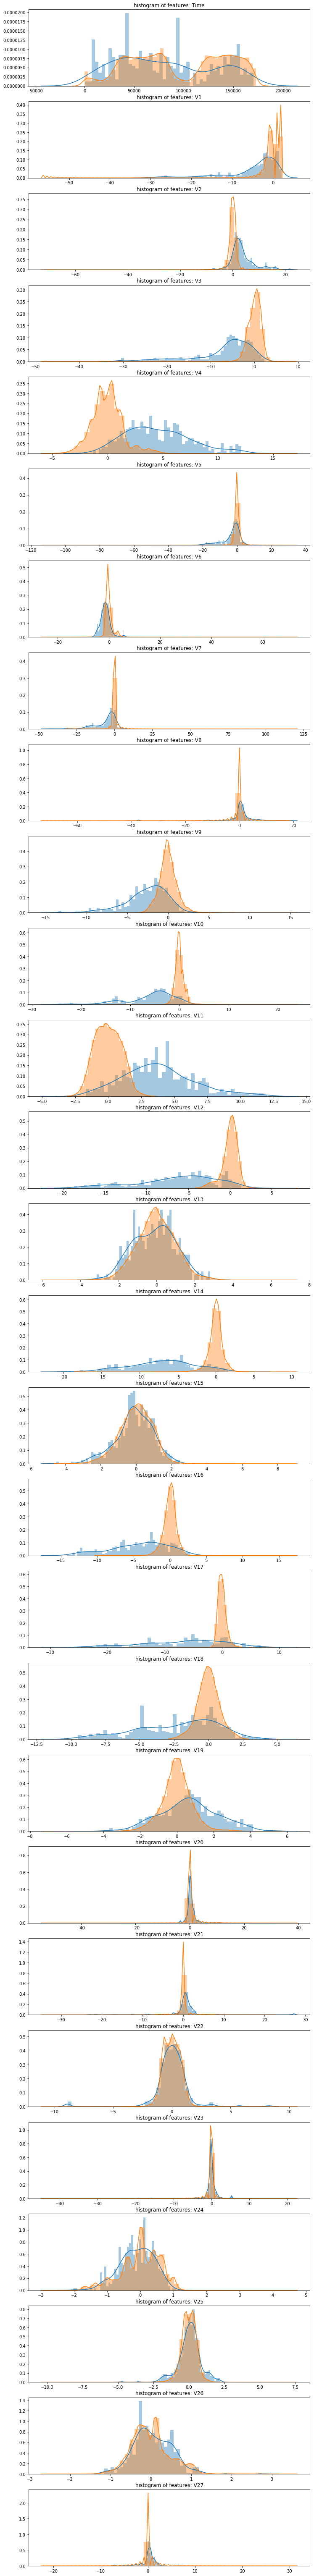

In [9]:
from matplotlib import gridspec
features = data.iloc[:, 0:28].columns

plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)
for i , c in enumerate(data[features]):
  ax= plt.subplot(gs[i])
  sns.distplot(data[c][data.Class==1], bins=50)
  sns.distplot(data[c][data.Class==0], bins=50)
  ax.set_xlabel('')
  ax.set_title('histogram of features: '+ str(c))

plt.show()

In [10]:
sample_data = data.sample(frac=0.1, random_state=1)
sample_data.shape

(28481, 31)

In [11]:
fraud = sample_data[sample_data['Class']==1]
valid = sample_data[sample_data['Class']==0]
print(fraud.shape, valid.shape)

(49, 31) (28432, 31)


In [12]:
outliers = len(fraud)/float(len(valid))
print(outliers)

0.0017234102419808666


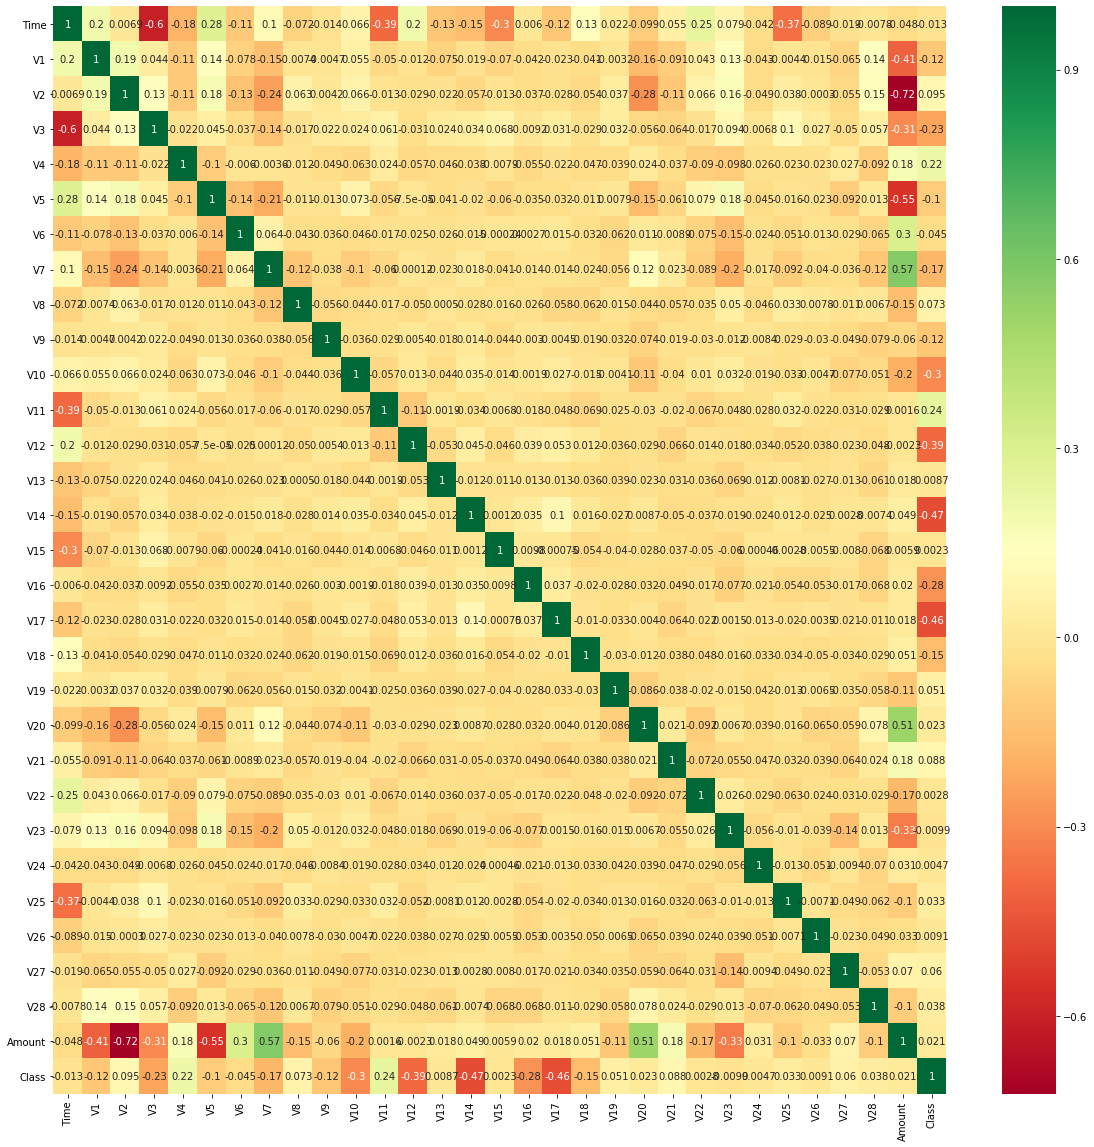

In [13]:
corrmat =sample_data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(corrmat[top_corr_feature].corr(),annot=True,cmap = "RdYlGn")

In [0]:
# separating X and y from sample_data
X = sample_data.drop('Class',axis = 1).values
y = sample_data['Class'].values

In [15]:
print(X.shape, y.shape)

(28481, 30) (28481,)


In [0]:
#split traina nd testset from sklear.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y) 

**Model Building**

In [25]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,319 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Front

In [17]:
import autosklearn.classification
import sklearn.metrics

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [0]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task = 120,per_run_time_limit=30)

In [21]:
automl.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-12-11 01:05:56,805:EnsembleBuilder(1):cbebabb00c71970cc37ebb2b2f54accf] No models better than random - using Dummy Score!
[WARNING] [2019-12-11 01:05:56,821:EnsembleBuilder(1):cbebabb00c71970cc37ebb2b2f54accf] No models better than random - using Dummy Score!
[WARNING] [2019-12-11 01:05:57,446:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-12-11 01:05:57,446:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-12-11 01:05:58,828:EnsembleBuilder(1):cbebabb00c71970cc37ebb2b2f54accf] No models better than random - using Dummy Score!
[WARNING] [2019-12-11 01:06:00,840:EnsembleBuilder(1):cbebabb00c71970cc37ebb2b2f54accf] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

1
['/tmp/autosklearn_tmp_1539_6630/.auto-sklearn/ensembles/1.0000000000.ensemble', '/tmp/autosklearn_tmp_1539_6630/.auto-sklearn/ensembles/1.0000000001.ensemble', '/tmp/autosklearn_tmp_1539_6630/.auto-sklearn/ensembles/1.0000000002.ensemble', '/tmp/autosklearn_tmp_1539_6630/.auto-sklearn/ensembles/1.0000000003.ensemble', '/tmp/autosklearn_tmp_1539_6630/.auto-sklearn/ensembles/1.0000000004.ensemble', '/tmp/autosklearn_tmp_1539_6630/.auto-sklearn/ensembles/1.0000000005.ensemble']


AutoSklearnClassifier(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_memory_limit=1024,
           ensemble_nbest=50, ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25, logging_config=None,
           metadata_directory=None, ml_memory_limit=3072, n_jobs=None,
           output_folder=None, per_run_time_limit=30,
           resampling_strategy='holdout',
           resampling_strategy_arguments=None, seed=1, shared_mode=False,
           smac_scenario_args=None, time_left_for_this_task=120,
           tmp_folder=None)

In [22]:
y_predict = automl.predict(X_test)
print("Auto Sklearn accuracy",sklearn.metrics.accuracy_score(y_test,y_predict))

Auto Sklearn accuracy 0.9994382811402893


In [24]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: cbebabb00c71970cc37ebb2b2f54accf
  Metric: accuracy
  Best validation score: 0.999433
  Number of target algorithm runs: 11
  Number of successful target algorithm runs: 8
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [25]:
print(automl.show_models())

[(0.240000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'random_forest', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'standardize', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'classifier:random_forest:n_estimators': 100, 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclas